## Упражнение 9

Найдём матрицу Грама данной системы векторов.

$e_i = x^i$

В $L_2([0; 1])$ скалярное произведение вычисляется как $\int_0^1 f(x) \overline{g(x)} dx$.

Тогда $A_{ij} = (e_i, e_j) = \int_0^1 x^{i+j} dx = \frac{1}{i + j + 1}$.

In [200]:
import numpy as np
import matplotlib.pyplot as pylab

def get_gramian(n):
    res = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            res[i][j] = 1 / (i + j + 1)
    return res
            

Далее найдём максимальное собственное значение с помощью метода прямых итераций.

In [201]:
eps = 10 ** 7

def normalize(u):
    norm = np.linalg.norm(u)
    if norm > eps:
        return u / norm
    return u
    
def get_max_eigenvalue_iterative_method(A, n, it_num):
    u_cur = np.ones(n)
    u_prev = np.zeros(n)
        
    for i in range(it_num):
        u_cur = normalize(u_cur)
        u_prev = u_cur.copy()
        u_cur = A @ u_cur
    
    return np.inner(u_cur, u_prev) / np.inner(u_prev, u_prev)

Найдём функцию зависимости максимального собственного числа от n. Сначала построим график зависимости: 

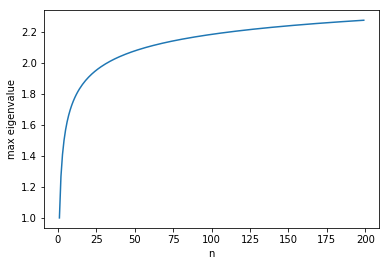

In [202]:
ns_max = range(1, 200)
ys_max = [get_max_eigenvalue_iterative_method(get_gramian(n), n, 1000) for n in ns_max]
pylab.xlabel("n")
pylab.ylabel("max eigenvalue")
pylab.plot(ns_max, ys_max)
pylab.show()

Предположим, что зависимость имеет вид $n^{M * x}$, где $M$ - максимальное собственное значение. Построим графики для различных x. Видим, что для $x = \frac{1}{3}$ зависимость становится линейной.

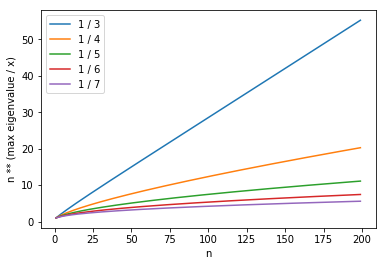

In [203]:
ys1 = [n ** (get_max_eigenvalue_iterative_method(get_gramian(n), n, 1000) / 3) for n in ns_max]
ys2 = [n ** (get_max_eigenvalue_iterative_method(get_gramian(n), n, 1000) / 4) for n in ns_max]
ys3 = [n ** (get_max_eigenvalue_iterative_method(get_gramian(n), n, 1000) / 5) for n in ns_max]
ys4 = [n ** (get_max_eigenvalue_iterative_method(get_gramian(n), n, 1000) / 6) for n in ns_max]
ys5 = [n ** (get_max_eigenvalue_iterative_method(get_gramian(n), n, 1000) / 7) for n in ns_max]
pylab.ylabel("n ** (max eigenvalue / x)")
pylab.xlabel("n")
pylab.plot(ns_max, ys1, label="1 / 3")
pylab.plot(ns_max, ys2, label="1 / 4")
pylab.plot(ns_max, ys3, label="1 / 5")
pylab.plot(ns_max, ys4, label="1 / 6")
pylab.plot(ns_max, ys5, label="1 / 7")
pylab.legend()
pylab.show()

Теперь можем отыскать примерную функцию. 
$n^{M / 3} = kn \Rightarrow M / 3 = \log_{n}{k} + 1 \Rightarrow M = 3(\log_{n}{k} + 1)$. То есть зависимость логарифмическая.

Далее найдём минимальное собственное значение методом итераций со сдвигом.

In [204]:
def get_min_eigenvalue_shift_method(n, it_num):
    alpha = get_max_eigenvalue_iterative_method(get_gramian(n), n, it_num) + 10 ** (-6)
    A_shift = get_gramian(n) - alpha * np.identity(n)
    return get_max_eigenvalue_iterative_method(A_shift, n, it_num) + alpha

Построим требуемый график.

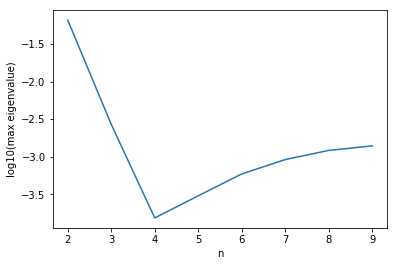

In [205]:
ns_min = range(2, 10)
ys_min = [np.log10(get_min_eigenvalue_shift_method(n, 1000)) for n in ns_min]
pylab.xlabel("n")
pylab.ylabel("log10(max eigenvalue)")
pylab.plot(ns_min, ys_min)
pylab.show()

Проверим утверждение с лекции о плохой сходимости метода при поиске минимума.

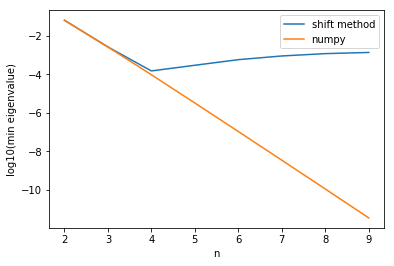

In [206]:
def get_min_eigenvalue_numpy(A):
    return min(np.linalg.eig(A)[0])

ys2_min = [np.log10(get_min_eigenvalue_numpy(get_gramian(n))) for n in ns_min]

pylab.xlabel("n")
pylab.ylabel("log10(min eigenvalue)")
pylab.plot(ns_min, ys_min, label="shift method")
pylab.plot(ns_min, ys2_min, label="numpy")
pylab.legend()
pylab.show()

Как мы видим, действительно, начиная с n=4, значения резко расходятся.

Теперь построим график $\kappa(A)$. Так как мы убедились, что минимальное значение, полученное методом сдвига, отличается от реальности, то можно предположить, что и $\kappa(A)$, полученная с использованием метода сдвига, также будет отличаться от значения, которое могло бы быть получено с помощью numpy. Поэтому построим два графика, используя разные способы.

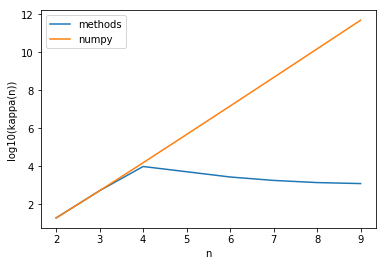

In [207]:
def get_kappa_with_methods(A):
    n = A.shape[0]
    return np.abs(get_max_eigenvalue_iterative_method(A, n, 1000) / get_min_eigenvalue_shift_method(n, 1000))

def get_kappa_with_numpy(A):
    return np.abs(max(np.linalg.eig(A)[0]) / min(np.linalg.eig(A)[0]))

ns_kappa = range(2, 10)

ys_kappa = [np.log10(get_kappa_with_methods(get_gramian(n))) for n in ns_kappa]
ys2_kappa = [np.log10(get_kappa_with_numpy(get_gramian(n))) for n in ns_kappa]

pylab.xlabel("n")
pylab.ylabel("log10(kappa(n))")
pylab.plot(ns_kappa, ys_kappa, label="methods")
pylab.plot(ns_kappa, ys2_kappa, label="numpy")
pylab.legend()
pylab.show()


Численно найдём примерную зависимость. Как показывает график для метода с использованием numpy, зависимость $\log_{10}{(\kappa(A))}$  от n линейна. $\log_{10}{(\kappa(A))} = kn \Rightarrow \kappa(A) = 10^{k} 10^{n}$.

Теперь применим метод Эйткена ускорения сходимости в пункте 2.

In [208]:
def init(A, u):
    u1 = u
    u2 = A @ u1
    u3 = A @ u2
    
    s1 = np.inner(u2, u1) / np.inner(u1, u1)
    s2 = np.inner(u3, u2) / np.inner(u2, u2)
    s3 = np.inner(A @ u3, u3) / np.inner(u3, u3)
    
    return s1, s2, s3, u3, s3 - (s3 - s2) ** 2 / (s3 - 2 * s2 + s1)

def get_max_eigenvalue_iterative_method_aitken(A, it_num):
    n = A.shape[0]
    u = np.ones(n)
    
    s1, s2, s3, cur_u, ans = init(A, u)
    
    for k in range(4, it_num):
        s1, s2 = s2, s3
        
        cur_u = normalize(cur_u)
        cur_u = A @ cur_u
    
        s3 = np.inner(A @ cur_u, cur_u) / np.inner(cur_u, cur_u)
        if s3 - s2 - s2 + s1 != 0:
            ans = s3 - (s3 - s2) ** 2 / (s3 - 2 * s2 + s1)
    return ans

def get_min_eigenvalue_shift_method_aitken(A, it_num):
    n = A.shape[0]
    alpha = get_max_eigenvalue_iterative_method(get_gramian(n), n, it_num) + 10 ** (-3)
    A_shift = A - alpha * np.identity(n)
    return get_max_eigenvalue_iterative_method_aitken(A_shift, it_num) + alpha

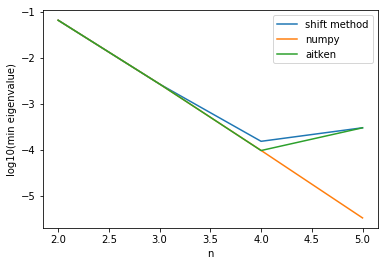

In [209]:
ns_min_aitken = range(2, 6)

ys_min = [np.log10(get_min_eigenvalue_shift_method(n, 1000)) for n in ns_min_aitken]
ys2_min = [np.log10(get_min_eigenvalue_numpy(get_gramian(n))) for n in ns_min_aitken]
ys3_min = [np.log10(get_min_eigenvalue_shift_method_aitken(get_gramian(n), 1000)) for n in ns_min_aitken]

pylab.xlabel("n")
pylab.ylabel("log10(min eigenvalue)")
pylab.plot(ns_min_aitken, ys_min, label="shift method")
pylab.plot(ns_min_aitken, ys2_min, label="numpy")
pylab.plot(ns_min_aitken, ys3_min, label="aitken")
pylab.legend()
pylab.show()

Метод Эйткина чуть позже начинает разниться с реальным значением.